In [1]:
# Download the data from your GitHub repository
!wget https://raw.githubusercontent.com/yotam-biu/ps9/main/parkinsons.csv -O /content/parkinsons.csv
!wget https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py -O /content/lab_setup_do_not_edit.py
import lab_setup_do_not_edit

--2025-12-29 09:34:17--  https://raw.githubusercontent.com/yotam-biu/ps9/main/parkinsons.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30202 (29K) [text/plain]
Saving to: ‘/content/parkinsons.csv’

/content/parkinsons 100%[===================>]  29.49K  --.-KB/s    in 0.003s  

2025-12-29 09:34:17 (9.06 MB/s) - ‘/content/parkinsons.csv’ saved [30202/30202]

--2025-12-29 09:34:17--  https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1579 (1.5K



## 1. **Load the dataset:**  

   After running the first cell of this notebook, the file `parkinson.csv` will appear in the `Files` folder.
   You need to loaded the file as a DataFrame.  




In [2]:
import pandas as pd

df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S10_1,237.226,247.326,225.227,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
1,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,...,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
2,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
3,phon_R01_S26_1,193.030,208.900,80.297,0.00766,0.00004,0.00450,0.00389,0.01351,0.03044,...,0.05312,0.00947,21.934,1,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668
4,phon_R01_S32_4,120.256,125.306,104.773,0.00407,0.00003,0.00224,0.00205,0.00671,0.01516,...,0.02164,0.01015,26.017,1,0.468621,0.735136,-6.112667,0.217013,2.527742,0.170633


## 2. **Select features:**  

   - Choose **two features** as inputs for the model.  
   - Identify **one feature** to use as the output for the model.  

  #### Advice:  
  - You can refer to the paper available in the GitHub repository for insights into the dataset and guidance on identifying key features for the input and output.  
  - Alternatively, consider creating pair plots or using other EDA methods we learned in the last lecture to explore the relationships between features and determine which ones are most relevant.  


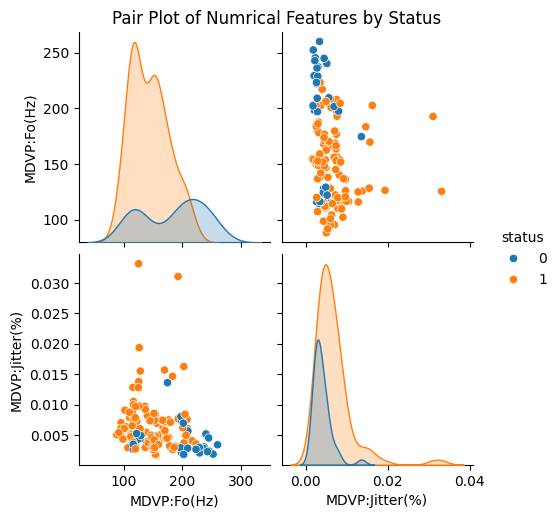

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clean = df.dropna(subset=['status'])

x = df_clean[['MDVP:Jitter(%)', 'MDVP:Fo(Hz)']]
y = df_clean[['status']]

sns.pairplot(df_clean, vars=['MDVP:Fo(Hz)', 'MDVP:Jitter(%)'], hue= 'status')
plt.suptitle('Pair Plot of Numrical Features by Status', y=1.02)
plt.show()

## 3. **Scale the data:**

   Apply the `MinMaxScaler` to scale the two input columns to a range between 0 and 1.  


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scales = scaler.fit_transform(x)
len(x_scales)

156

## 4. **Split the data:**

   Divide the dataset into a training set and a validation set.





In [6]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scales, y, test_size=0.2)
len(x_train), len(x_test)


(124, 32)

## 5. **Choose a model:**  

   Select a model to train on the data.  

   #### Advice:  
   - Consider using the model discussed in the paper from the GitHub repository as a reference.  


In [7]:

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

# 6. **Test the accuracy:**  

   Evaluate the model's accuracy on the test set. Ensure that the accuracy is at least **0.8**.  


In [8]:

from sklearn.metrics import accuracy_score

y_predict = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

Accuracy: 0.875


## 7. **Save and upload the model:**  

   After you are happy with your results, save the model with the `.joblib` extension and upload it to your GitHub repository main folder.
   
   Additionally, update the `config.yaml` file with the list of selected features and the model's joblib file name.  


example:  
```yaml
selected_features: ["A", "B"]  
path: "my_model.joblib"  
```

In [10]:
import joblib

joblib.dump(model, 'mya_model.joblib')

['mya_model.joblib']

## 8. **Copy the code:**  

   Copy and paste all the code from this notebook into a `main.py` file in the GitHub repository.  
